# Goal of this notebook

This notebook allows to test the fully connected neural network made from scratch that you can find inside the script FC_nn.py. 

&nbsp;

You can reach 99% of accuracy on the mnist test dataset with it.

&nbsp;

It also allows to compare this network with fully connected network of keras.

# Load standard libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load mnist data

In [26]:
from keras.datasets import mnist

In [27]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Vizualize mnist data

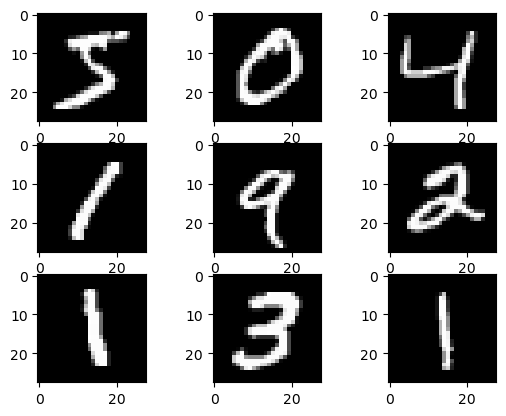

In [28]:
fig, ax = plt.subplots(3,3)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(train_X[k], cmap=plt.get_cmap('gray'))
        k += 1
plt.show()

# Load the FC NN made from scratch

In [29]:
from FC_nn import FC

In [30]:
from FC_nn_without_bias import FC_withou_b

# Preprocess mnist data

## reshape and renormalize

In [31]:
x_train = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2]).T
x_train = x_train/255
train_y_reshape = train_y.reshape(1, train_y.shape[0])
x_test = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2]).T
x_test = x_test/255
test_y_reshape = test_y.reshape(1, test_y.shape[0])

## reorganize target 

In [32]:
# reorganize y data, as I need 0 or 1 on each output, 
# and not 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
y_train = np.zeros((10, train_y_reshape.shape[1]))
y_test = np.zeros((10, test_y_reshape.shape[1]))
for i in range(10):
    ind_train_i = np.where(train_y_reshape[0] == i)[0]
    y_train[i,ind_train_i] = 1
    ind_test_i = np.where(test_y_reshape[0] == i)[0]
    y_test[i,ind_test_i] = 1

# Run the FC NN made from scratch

In [33]:
# hyperparameters of models (both from scratch and keras)
learning_rate = 0.01 # rate the weights are updated
N_units = 16 # number of neurons inside layer
batch_size = 32 # size of batch
N_epochs = 100 # number of epochs
patience = 5 # for early stopping
verbose = 10 # for print results at each epoch

In [34]:
hidden_layers = np.array([N_units, N_units])
fc = FC()
fc.learning_rate = learning_rate
fc.n_epochs = N_epochs
fc.stop_th = patience
fc.batch_size = batch_size
fc.verbose = verbose
par, mes = fc.train_nn(x_train, y_train, hidden_layers, x_test, y_test)

N_batch =  1875 ,  N_weights =  12960 ,  N_biaises =  42


epoch =  0 ,  test_loss = 0.32097 ,  test_acc = 0.89994
epoch =  10 ,  test_loss = 0.16707 ,  test_acc = 0.93847
epoch =  20 ,  test_loss = 0.11794 ,  test_acc = 0.96042
epoch =  30 ,  test_loss = 0.09477 ,  test_acc = 0.96954
epoch =  40 ,  test_loss = 0.08196 ,  test_acc = 0.97374
epoch =  50 ,  test_loss = 0.07435 ,  test_acc = 0.97616
epoch =  60 ,  test_loss = 0.06916 ,  test_acc = 0.97794
epoch =  70 ,  test_loss = 0.06547 ,  test_acc = 0.97910
epoch =  80 ,  test_loss = 0.06268 ,  test_acc = 0.97987
epoch =  90 ,  test_loss = 0.06043 ,  test_acc = 0.98060


# Visualisation of loss and accuracy

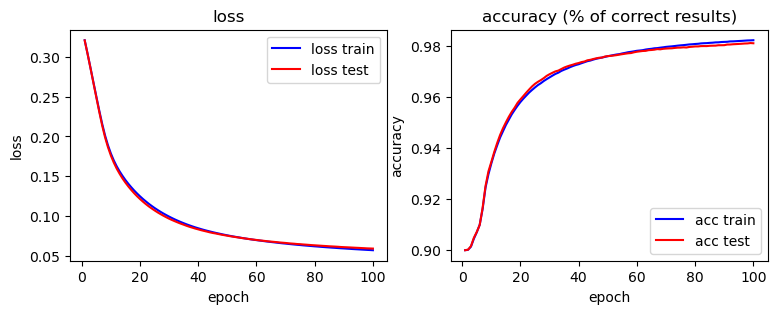

In [35]:
# visualisation: plot of loss and accuracy for train and test
train_loss = mes['train_loss']
test_loss = mes['test_loss']
train_acc = mes['train_acc']
test_acc = mes['test_acc']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
ax[0].plot(range(1,len(train_acc)+1),train_loss, c='b', label='loss train')
ax[0].plot(range(1,len(train_acc)+1),test_loss, c='r', label='loss test')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(range(1,len(train_acc)+1),train_acc, c='b', label='acc train')
ax[1].plot(range(1,len(train_acc)+1),test_acc, c='r', label='acc test')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_title('accuracy (% of correct results)')
ax[1].legend()
plt.show()

# FC NN without bias

In [36]:
hidden_layers = np.array([N_units, N_units])
fc_without_b = FC_withou_b()
fc_without_b.learning_rate = learning_rate
fc_without_b.n_epochs = N_epochs
fc_without_b.stop_th = patience
fc_without_b.batch_size = batch_size
fc_without_b.verbose = verbose
par_w, mes_w = fc_without_b.train_nn(x_train, y_train, hidden_layers, x_test, y_test)

N_batch =  1875 ,  N_weights =  12960
epoch =  0 ,  test_loss = 0.31643 ,  test_acc = 0.89948
epoch =  10 ,  test_loss = 0.17201 ,  test_acc = 0.93822
epoch =  20 ,  test_loss = 0.12355 ,  test_acc = 0.95753
epoch =  30 ,  test_loss = 0.10207 ,  test_acc = 0.96586
epoch =  40 ,  test_loss = 0.08989 ,  test_acc = 0.97082
epoch =  50 ,  test_loss = 0.08163 ,  test_acc = 0.97404
epoch =  60 ,  test_loss = 0.07585 ,  test_acc = 0.97595
epoch =  70 ,  test_loss = 0.07128 ,  test_acc = 0.97756
epoch =  80 ,  test_loss = 0.06787 ,  test_acc = 0.97868
epoch =  90 ,  test_loss = 0.06511 ,  test_acc = 0.97956


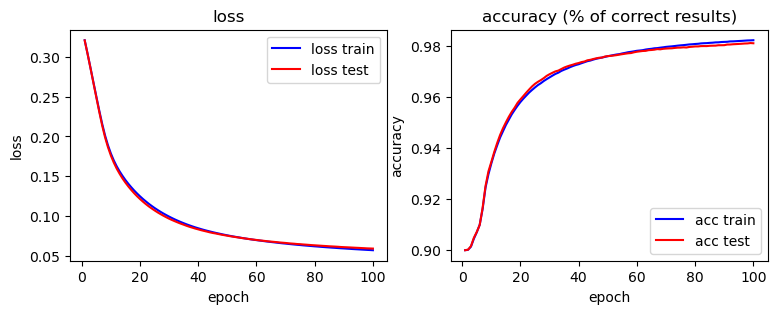

In [37]:
# visualisation: plot of loss and accuracy for train and test
train_loss_w = mes_w['train_loss']
test_loss_w = mes_w['test_loss']
train_acc_w = mes_w['train_acc']
test_acc_w = mes_w['test_acc']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
ax[0].plot(range(1,len(train_acc)+1),train_loss, c='b', label='loss train')
ax[0].plot(range(1,len(train_acc)+1),test_loss, c='r', label='loss test')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(range(1,len(train_acc)+1),train_acc, c='b', label='acc train')
ax[1].plot(range(1,len(train_acc)+1),test_acc, c='r', label='acc test')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_title('accuracy (% of correct results)')
ax[1].legend()
plt.show()

# keras FC NN model

In [38]:
import tensorflow as tf

In [39]:
# input and output dimensions of mnist data
input_dim = train_X.shape[1:]
output_dim = len(np.unique(train_y))
# create sequential model with sigmoid activation function as my FC NN from scratch
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_dim))
model.add(tf.keras.layers.Dense(units=N_units, activation='sigmoid')) #'sigmoid')) 
model.add(tf.keras.layers.Dense(units=N_units, activation='sigmoid')) #'sigmoid')) 
model.add(tf.keras.layers.Dense(units=output_dim, activation='sigmoid')) #'sigmoid')) 
# compile and use a crossentropy loss function as my fc nn from scratch
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['acc'])
# train the model with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience)
history = model.fit(x=train_X, y=train_y,
                    epochs=N_epochs, batch_size=batch_size,
                    validation_data=(test_X, test_y),
                    callbacks=[callback],
                    verbose=verbose)
# get model summary
model.summary()

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
     

# Compare keras and from scratch model

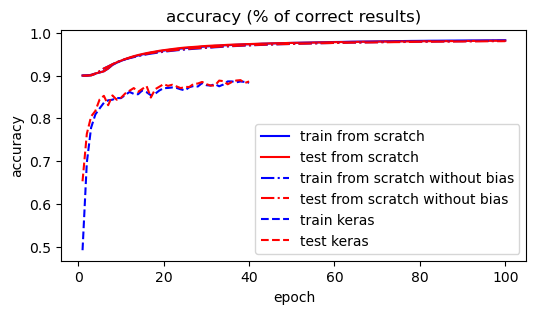

In [40]:
# visualisation: plot of loss and accuracy for train and test
train_loss = mes['train_loss']
test_loss = mes['test_loss']
train_acc = mes['train_acc']
test_acc = mes['test_acc']
train_loss_w = mes_w['train_loss']
test_loss_w = mes_w['test_loss']
train_acc_w = mes_w['train_acc']
test_acc_w = mes_w['test_acc']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax.plot(range(1,len(train_acc)+1),train_acc, 
        c='b', label='train from scratch')
ax.plot(range(1,len(test_acc)+1),test_acc, 
        c='r', label='test from scratch')
ax.plot(range(1,len(train_acc_w)+1),train_acc_w, 
        c='b', ls="-.", label='train from scratch without bias')
ax.plot(range(1,len(test_acc_w)+1),test_acc_w, 
        c='r', ls="-.", label='test from scratch without bias')
ax.plot(range(1,len(history.history['acc'])+1),history.history['acc'],
        c='b',ls='--',  label='train keras')
ax.plot(range(1,len(history.history['val_acc'])+1),history.history['val_acc'], 
        c='r',ls='--', label='test keras')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('accuracy (% of correct results)')
ax.legend()
plt.show()